In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [6]:

# Suppress TensorFlow logging
tf.get_logger().setLevel('ERROR')

# Define dataset path
dataset_path = "data/plantvillage"

In [7]:
# Image data generator with augmentation
data_gen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


In [8]:

# Load training and validation data
train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 16516 images belonging to 15 classes.


In [9]:
val_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4122 images belonging to 15 classes.


In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(len(train_data.class_indices), activation='softmax')
])

/home/sumit/jupyter-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-01 19:18:33.360286: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-02-01 19:18:33.360593: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: sinmit
2025-02-01 19:18:33.360602: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: sinmit
2025-02-01 19:18:33.360800: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 555.58.2
2025-02-01 19:1

In [11]:

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)


/home/sumit/jupyter-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-02-01 19:19:11.703061: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2025-02-01 19:19:12.405567: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


517/517 ━━━━━━━━━━━━━━━━━━━━ 831s 2s/step - accuracy: 0.3234 - loss: 2.0926 - val_accuracy: 0.6914 - val_loss: 0.9264
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 808s 2s/step - accuracy: 0.6459 - loss: 1.0435 - val_accuracy: 0.7552 - val_loss: 0.6961
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 834s 2s/step - accuracy: 0.7247 - loss: 0.8180 - val_accuracy: 0.7889 - val_loss: 0.6183
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.7628 - loss: 0.7005 - val_accuracy: 0.8668 - val_loss: 0.4120
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 821s 2s/step - accuracy: 0.7975 - loss: 0.5981 - val_accuracy: 0.8724 - val_loss: 0.3847
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 789s 2s/step - accuracy: 0.8156 - loss: 0.5451 - val_accuracy: 0.8877 - val_loss: 0.3376
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 822s 2s/step - accuracy: 0.8365 - loss: 0.4691 - val_accuracy: 0.8561 - val_loss: 0.4233
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.8576 - loss: 0.4264 - val_accuracy: 0.886

In [13]:
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Accuracy')

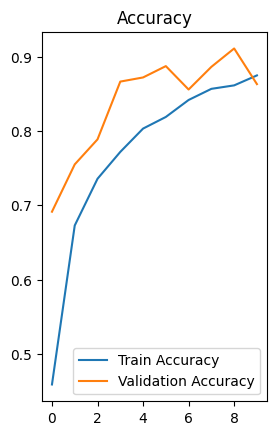

In [14]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

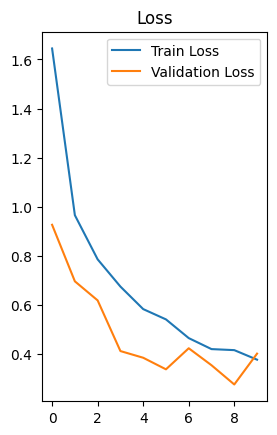

In [15]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [16]:
model.save("plant_disease_model.h5")


In [17]:
train_accuracy = history.history['accuracy'][-1]  # Last value in the training accuracy list
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


Training Accuracy: 87.52%


In [18]:
val_accuracy = history.history['val_accuracy'][-1]  # Last value in the validation accuracy list
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


Validation Accuracy: 86.34%
